# Network features Histograms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from read_json import read_json, as_json,plot_histogram  # for json files
# from sklearn.model_selection import train_test_split
import numpy as np


In [2]:
# read data
data = pd.read_csv("data_sample.csv")
# extract hostnames (just for future work)
hostnames = data["host"].unique()            # get unique names
hostnames = list(map(as_json, hostnames))  # get json files
hostnames_values = np.array([list(hostnames[i].values()) for i in range(len(hostnames))])

# get id of interest
id_float = data.system.map(lambda x: isinstance(x, float)) # same as is nan
id_string = data.system.map(lambda x: isinstance(x, str))  # shoudl be ~id_string
id_nan = data.system.isna()

# get all network data
id_network = data.loc[~id_nan]["event"].map(lambda x: "network" in x)
# get network values that are not NaN (otherwise, "as_json" does not work)
network_values = data.loc[id_string][id_network]["system"].map(lambda x: as_json(x))
# extract features of interest
out_bytes = network_values.map(lambda x: x["network"]["out"]["bytes"]).to_numpy()
in_bytes  = network_values.map(lambda x: x["network"]["in"]["bytes"] ).to_numpy()

# normalize data in (0,1) interval
# out_bytes.min() should be zero, but just in case 
out_bytes_norm = out_bytes/(out_bytes.max() - out_bytes.min())
in_bytes_norm = in_bytes/(in_bytes.max() - in_bytes.min())

# create dframe
network_df = pd.DataFrame(np.array([out_bytes, out_bytes_norm, in_bytes, in_bytes_norm]).T,
                          columns=["out_bytes", "out_bytes_norm", "in_bytes", "in_bytes_norm"],
                          index  = network_values.index)

In [18]:
# save df
network_df.to_csv("network_df.csv")

## Plots

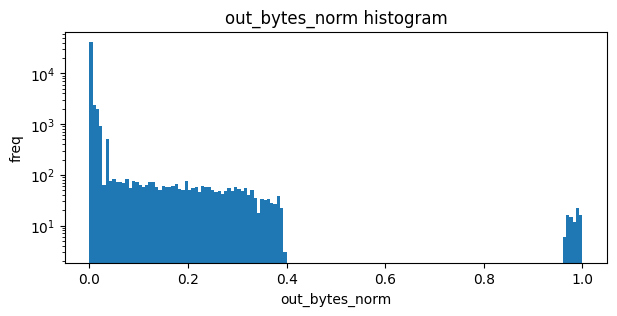

In [3]:
fig = plot_histogram(network_df.out_bytes_norm, bns=150,logscale=True)

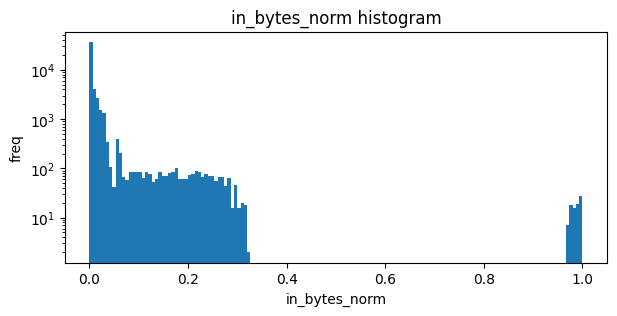

In [4]:
fig = plot_histogram(network_df.in_bytes_norm, bns=150,logscale=True)

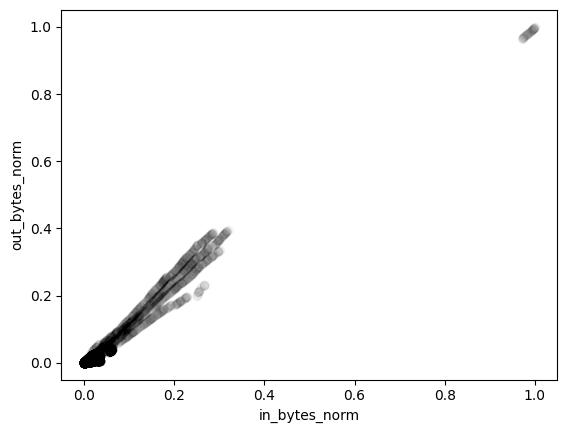

In [13]:
plt.scatter(in_bytes_norm, out_bytes_norm, alpha=0.01,c="k")
plt.xlabel(network_df.in_bytes_norm.name)
plt.ylabel(network_df.out_bytes_norm.name)
plt.show()